In [115]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [116]:
df = pd.read_csv('Sleep_Efficiency.csv')
df = df.dropna()
df = df.drop(columns=['Bedtime', 'Wakeup time'])
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,1,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,1,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,1,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,1,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
447,448,27,1,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,449,52,0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
450,451,45,0,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [117]:
df.keys()

Index(['ID', 'Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [118]:
# Preprocess the Data
# Assuming 'Sleep_Efficiency' is the target variable
X = df.drop(columns=['Sleep efficiency'])
y = df['Sleep efficiency']

In [119]:
# Perform Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix['Sleep efficiency'])

ID                        0.025931
Age                       0.124093
Gender                    0.008177
Sleep duration           -0.019164
Sleep efficiency          1.000000
REM sleep percentage      0.064038
Deep sleep percentage     0.789087
Light sleep percentage   -0.816934
Awakenings               -0.567885
Caffeine consumption      0.070804
Alcohol consumption      -0.397012
Smoking status           -0.292898
Exercise frequency        0.266050
Name: Sleep efficiency, dtype: float64


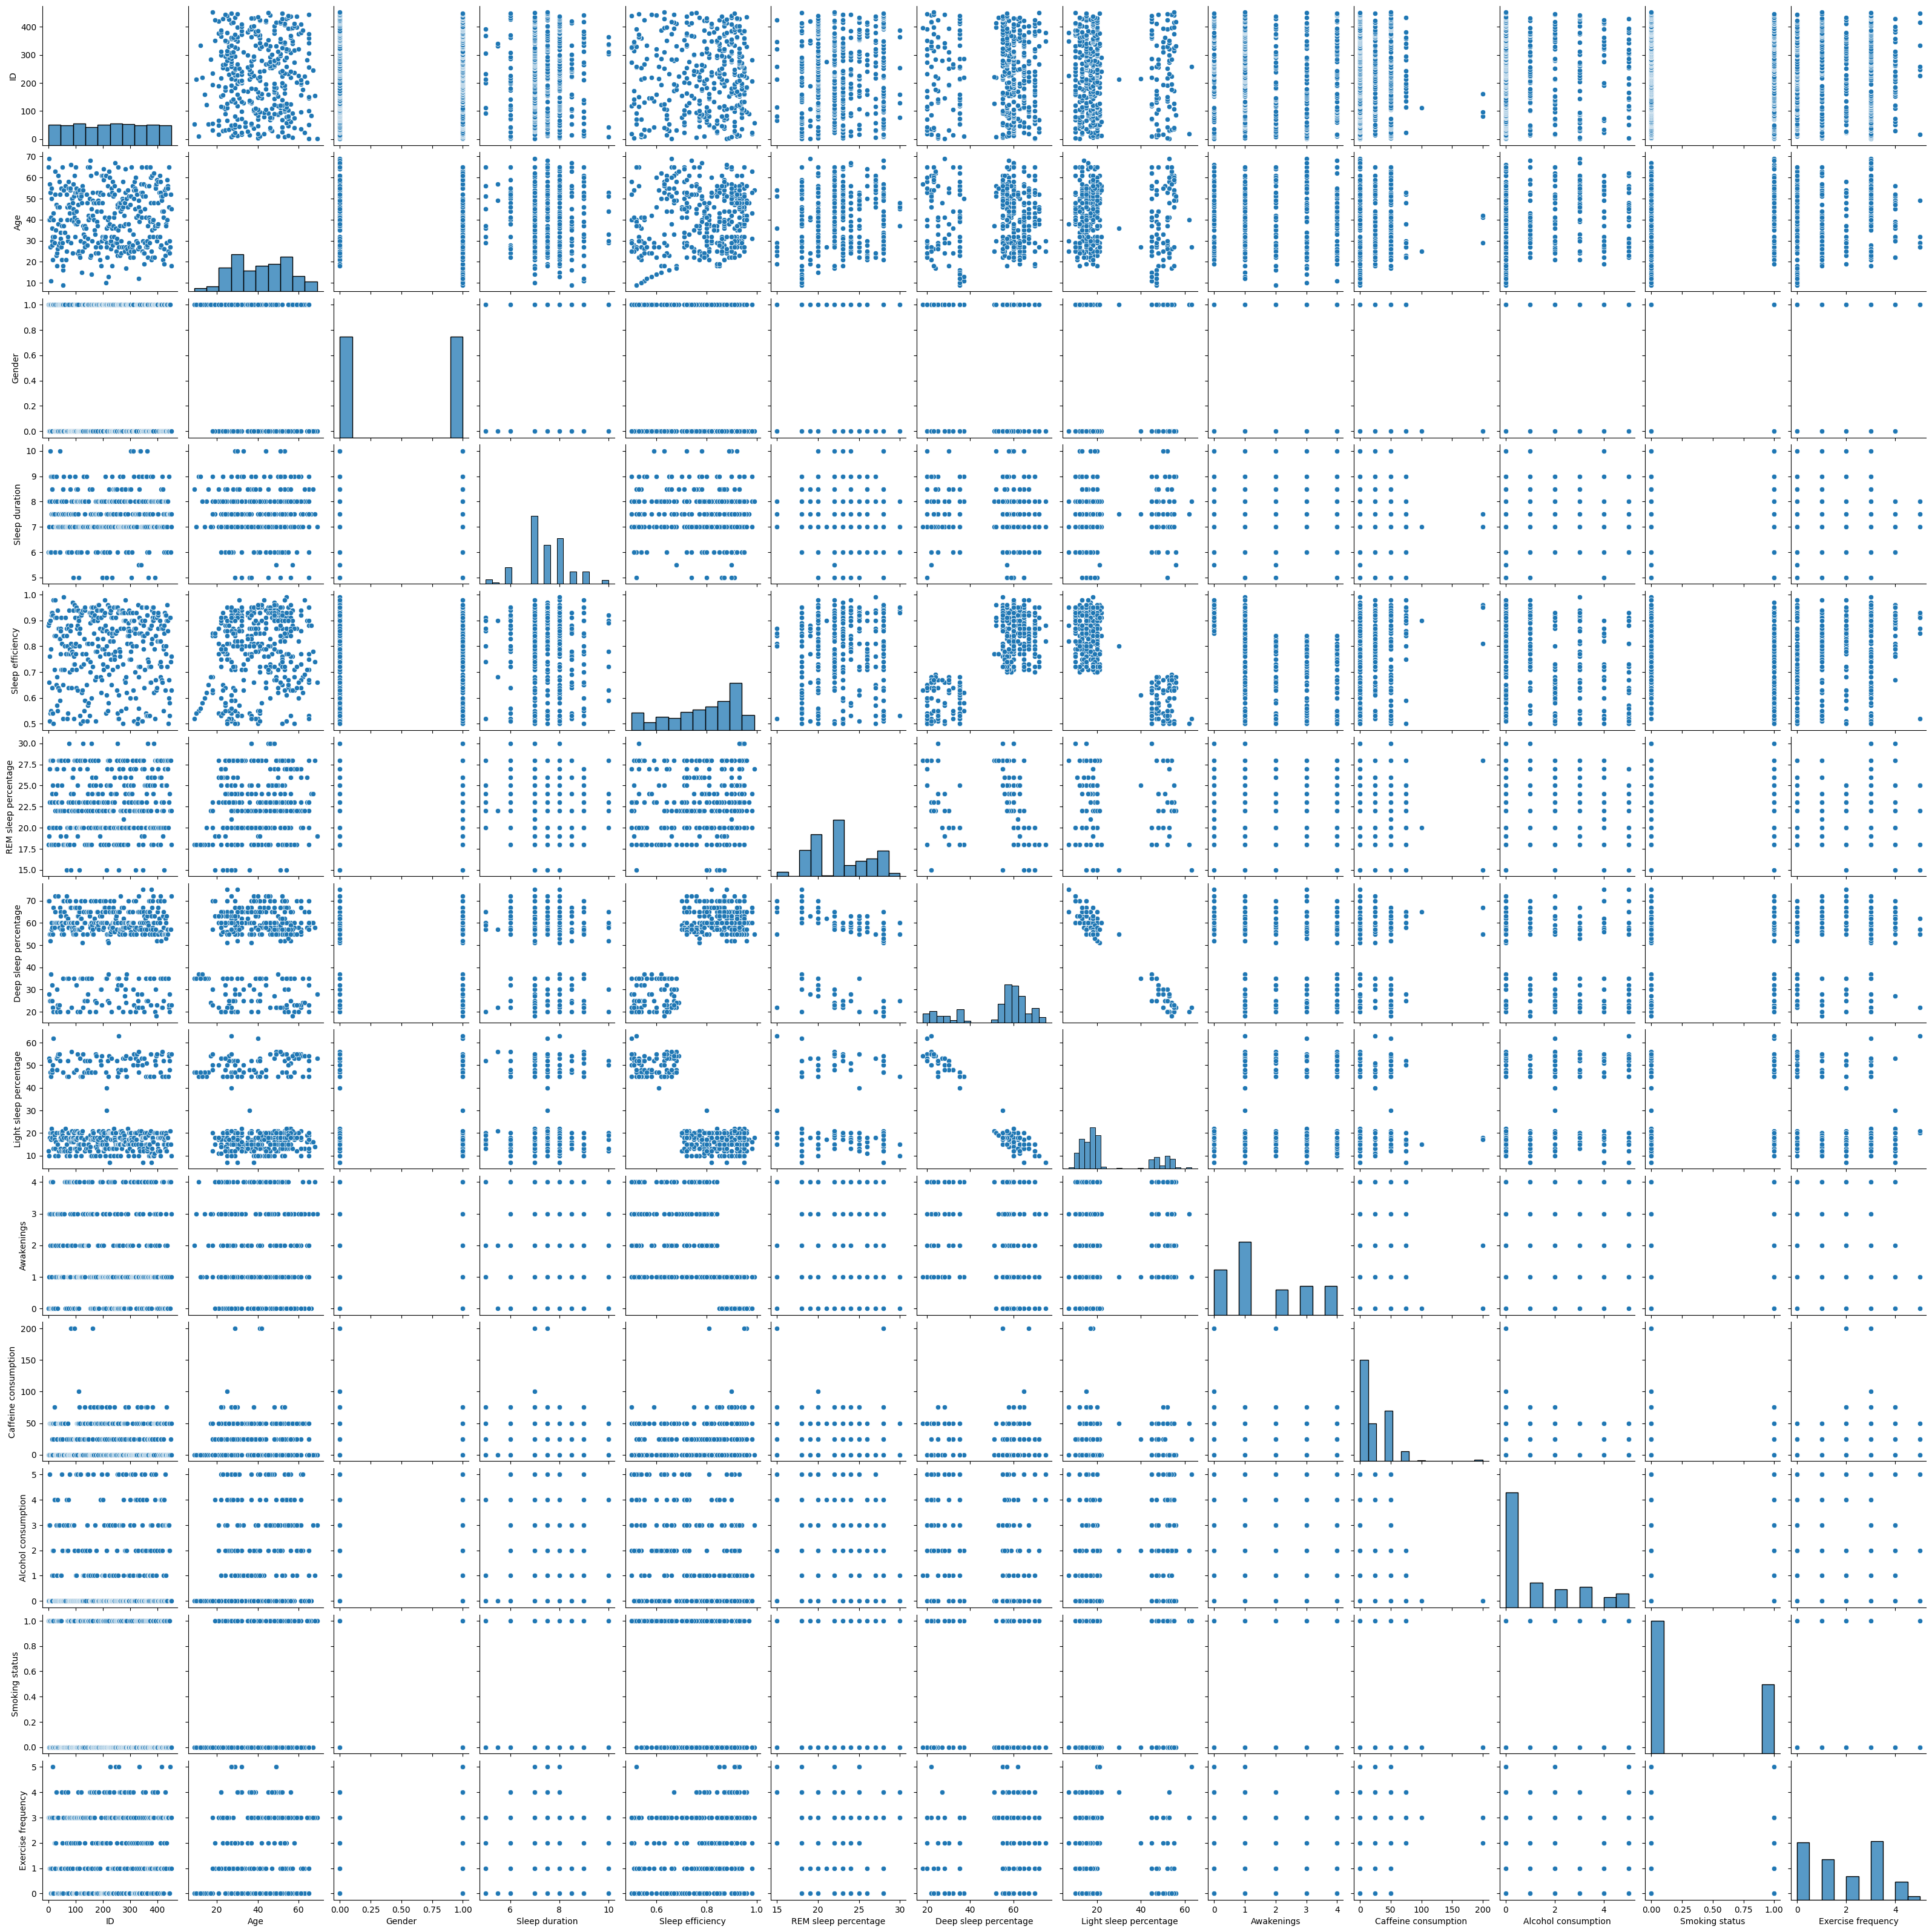

In [120]:
# Visualize Relationships
# Example: Pairplot
sns.pairplot(df)
plt.show()

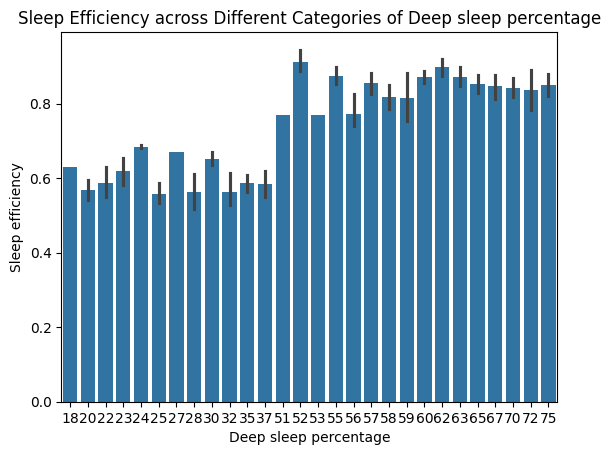

In [121]:
# Bar plot 1
sns.barplot(x='Deep sleep percentage', y='Sleep efficiency', data=df)
plt.xlabel('Deep sleep percentage')
plt.ylabel('Sleep efficiency')
plt.title('Sleep Efficiency across Different Categories of Deep sleep percentage')
plt.show()

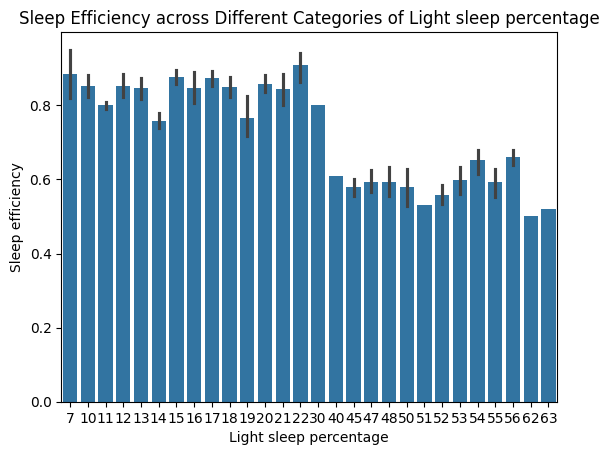

In [122]:
# Bar plot 2
sns.barplot(x='Light sleep percentage', y='Sleep efficiency', data=df)
plt.xlabel('Light sleep percentage')
plt.ylabel('Sleep efficiency')
plt.title('Sleep Efficiency across Different Categories of Light sleep percentage')
plt.show()

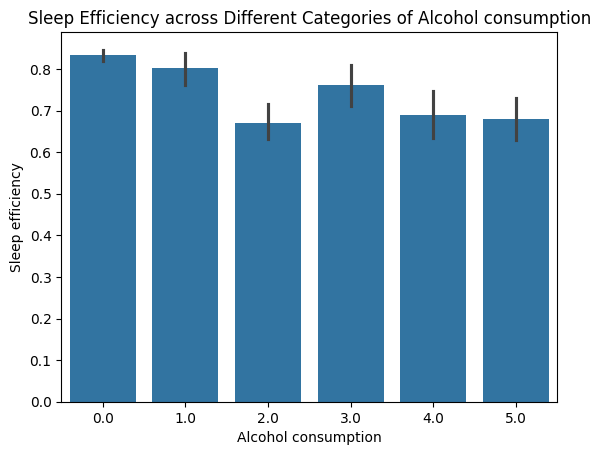

In [123]:
# Bar plot 3
sns.barplot(x='Alcohol consumption', y='Sleep efficiency', data=df)
plt.xlabel('Alcohol consumption')
plt.ylabel('Sleep efficiency')
plt.title('Sleep Efficiency across Different Categories of Alcohol consumption')
plt.show()

In [124]:
df['Efficiency Category'] = pd.qcut(df['Sleep efficiency'], q=2)

# Get the range of each bin
bin_ranges = df['Efficiency Category'].unique().sort_values()
print(bin_ranges)

[(0.499, 0.82], (0.82, 0.99]]
Categories (2, interval[float64, right]): [(0.499, 0.82] < (0.82, 0.99]]


In [125]:
bins = [0.499, 0.82, 0.99] # Define bins
labels = [0,1] # Define labels for the bins
df['Sleep efficiency class'] = pd.cut(df['Sleep efficiency'], bins=bins, labels=labels, include_lowest=True)

y = df['Sleep efficiency class'].astype(int)

In [126]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Choosing k value and create k-NN classifier
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn8 = KNeighborsClassifier(n_neighbors = 8)
knn10 = KNeighborsClassifier(n_neighbors = 10)

In [128]:
# Training the model
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn8.fit(X_train, y_train)
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [129]:
y_train_pred_1 = knn1.predict(X_train)
y_train_pred_3 = knn3.predict(X_train)
y_train_pred_5 = knn5.predict(X_train)
y_train_pred_8 = knn8.predict(X_train)
y_train_pred_10 = knn10.predict(X_train)

In [130]:
y_test_pred_1 = knn1.predict(X_test)
y_test_pred_3 = knn3.predict(X_test)
y_test_pred_5 = knn5.predict(X_test)
y_test_pred_8 = knn8.predict(X_test)
y_test_pred_10 = knn10.predict(X_test)

In [131]:
print("Accuracy with k=1", accuracy_score(y_test, y_test_pred_1))
print("Accuracy with k=3", accuracy_score(y_test, y_test_pred_3))
print("Accuracy with k=5", accuracy_score(y_test, y_test_pred_5))
print("Accuracy with k=8", accuracy_score(y_test, y_test_pred_8))
print("Accuracy with k=10", accuracy_score(y_test, y_test_pred_10))

Accuracy with k=1 0.6410256410256411
Accuracy with k=3 0.782051282051282
Accuracy with k=5 0.7564102564102564
Accuracy with k=8 0.717948717948718
Accuracy with k=10 0.7564102564102564


In [132]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred_3)
print(cm)

[[28 13]
 [ 4 33]]


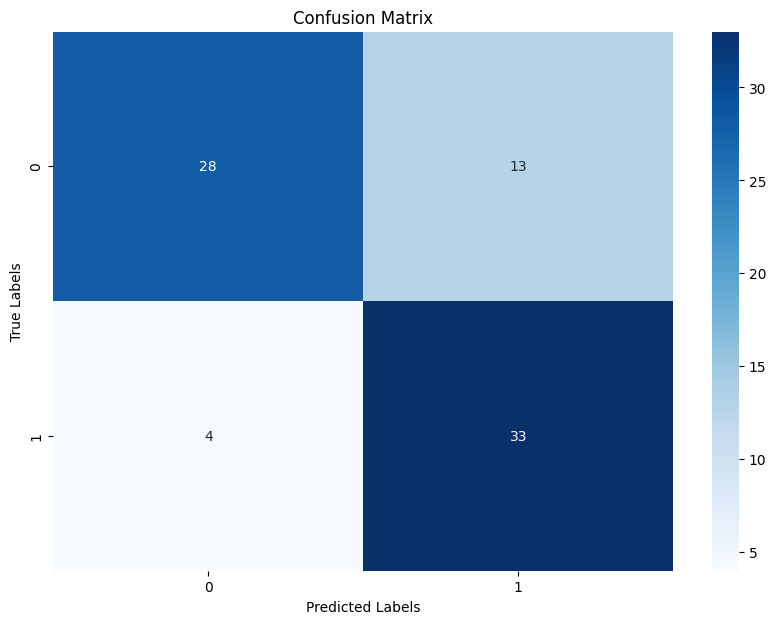

In [133]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'g' formatter prevents scientific notation
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [134]:
# Generating classification reports
train_report = classification_report(y_train, y_train_pred_3)
test_report = classification_report(y_test, y_test_pred_3)

print("Classification Report for Training Data:")
print(train_report)
print("\nClassification Report for Testing Data:")
print(test_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       156
           1       0.82      0.90      0.86       154

    accuracy                           0.85       310
   macro avg       0.85      0.85      0.85       310
weighted avg       0.85      0.85      0.85       310


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        41
           1       0.72      0.89      0.80        37

    accuracy                           0.78        78
   macro avg       0.80      0.79      0.78        78
weighted avg       0.80      0.78      0.78        78

